In [5]:
# TODO, show how different aggression configurations impact results
from qiskit.transpiler import CouplingMap
from mirror_gates.pass_managers import Mirage, QiskitLevel3
from transpile_benchy.metrics.abc_metrics import MetricInterface
from transpile_benchy.metrics.gate_counts import DepthMetric
from mirror_gates.utilities import DoNothing

In [6]:
from transpile_benchy.library import CircuitLibrary

library = CircuitLibrary.from_txt("../../circuits/aggression_select.txt")
# library = CircuitLibrary.from_txt("../../circuits/small_circuits.txt")
# library = CircuitLibrary.from_txt("speedups.txt")

In [7]:
coupling_map = CouplingMap.from_heavy_hex(5)
transpilers = [
    QiskitLevel3(coupling_map),
    Mirage(coupling_map, name="Mirage-a0", fixed_aggression=0, no_vf2=True),
    Mirage(coupling_map, name="Mirage-a1", fixed_aggression=1, no_vf2=True),
    Mirage(coupling_map, name="Mirage-a2", fixed_aggression=2, no_vf2=True),
    Mirage(coupling_map, name="Mirage-a3", fixed_aggression=3, no_vf2=True),
]

metrics = [DepthMetric(consolidate=False)]

In [8]:
from transpile_benchy.benchmark import Benchmark

# only interested in TimeMetric, is there by default
benchmark = Benchmark(
    transpilers=transpilers, circuit_library=library, metrics=metrics, num_runs=5
)
benchmark.run()

Circuits from library:   0%|          | 0/4 [00:00<?, ?it/s]

Loading bv_n30 from QASMBench


In [ ]:
print(benchmark.summary_statistics(transpilers[0], transpilers[1])["monodromy_depth"])
print(benchmark.summary_statistics(transpilers[0], transpilers[2])["monodromy_depth"])
print(benchmark.summary_statistics(transpilers[0], transpilers[3])["monodromy_depth"])
print(benchmark.summary_statistics(transpilers[0], transpilers[4])["monodromy_depth"])

{'average_change': 15.04572816461814, 'aggregrate_change': 4.499999999999999, 'best_circuit': 'bigadder_n18', 'worst_circuit': 'wstate_n27'}
{'average_change': 23.918266098116653, 'aggregrate_change': -13.000000000000018, 'best_circuit': 'qft_n18', 'worst_circuit': 'wstate_n27'}
{'average_change': 23.9833178037304, 'aggregrate_change': -11.83333333333335, 'best_circuit': 'qft_n18', 'worst_circuit': 'wstate_n27'}
{'average_change': 2.676701496054588, 'aggregrate_change': -11.666666666666703, 'best_circuit': 'qft_n18', 'worst_circuit': 'wstate_n27'}


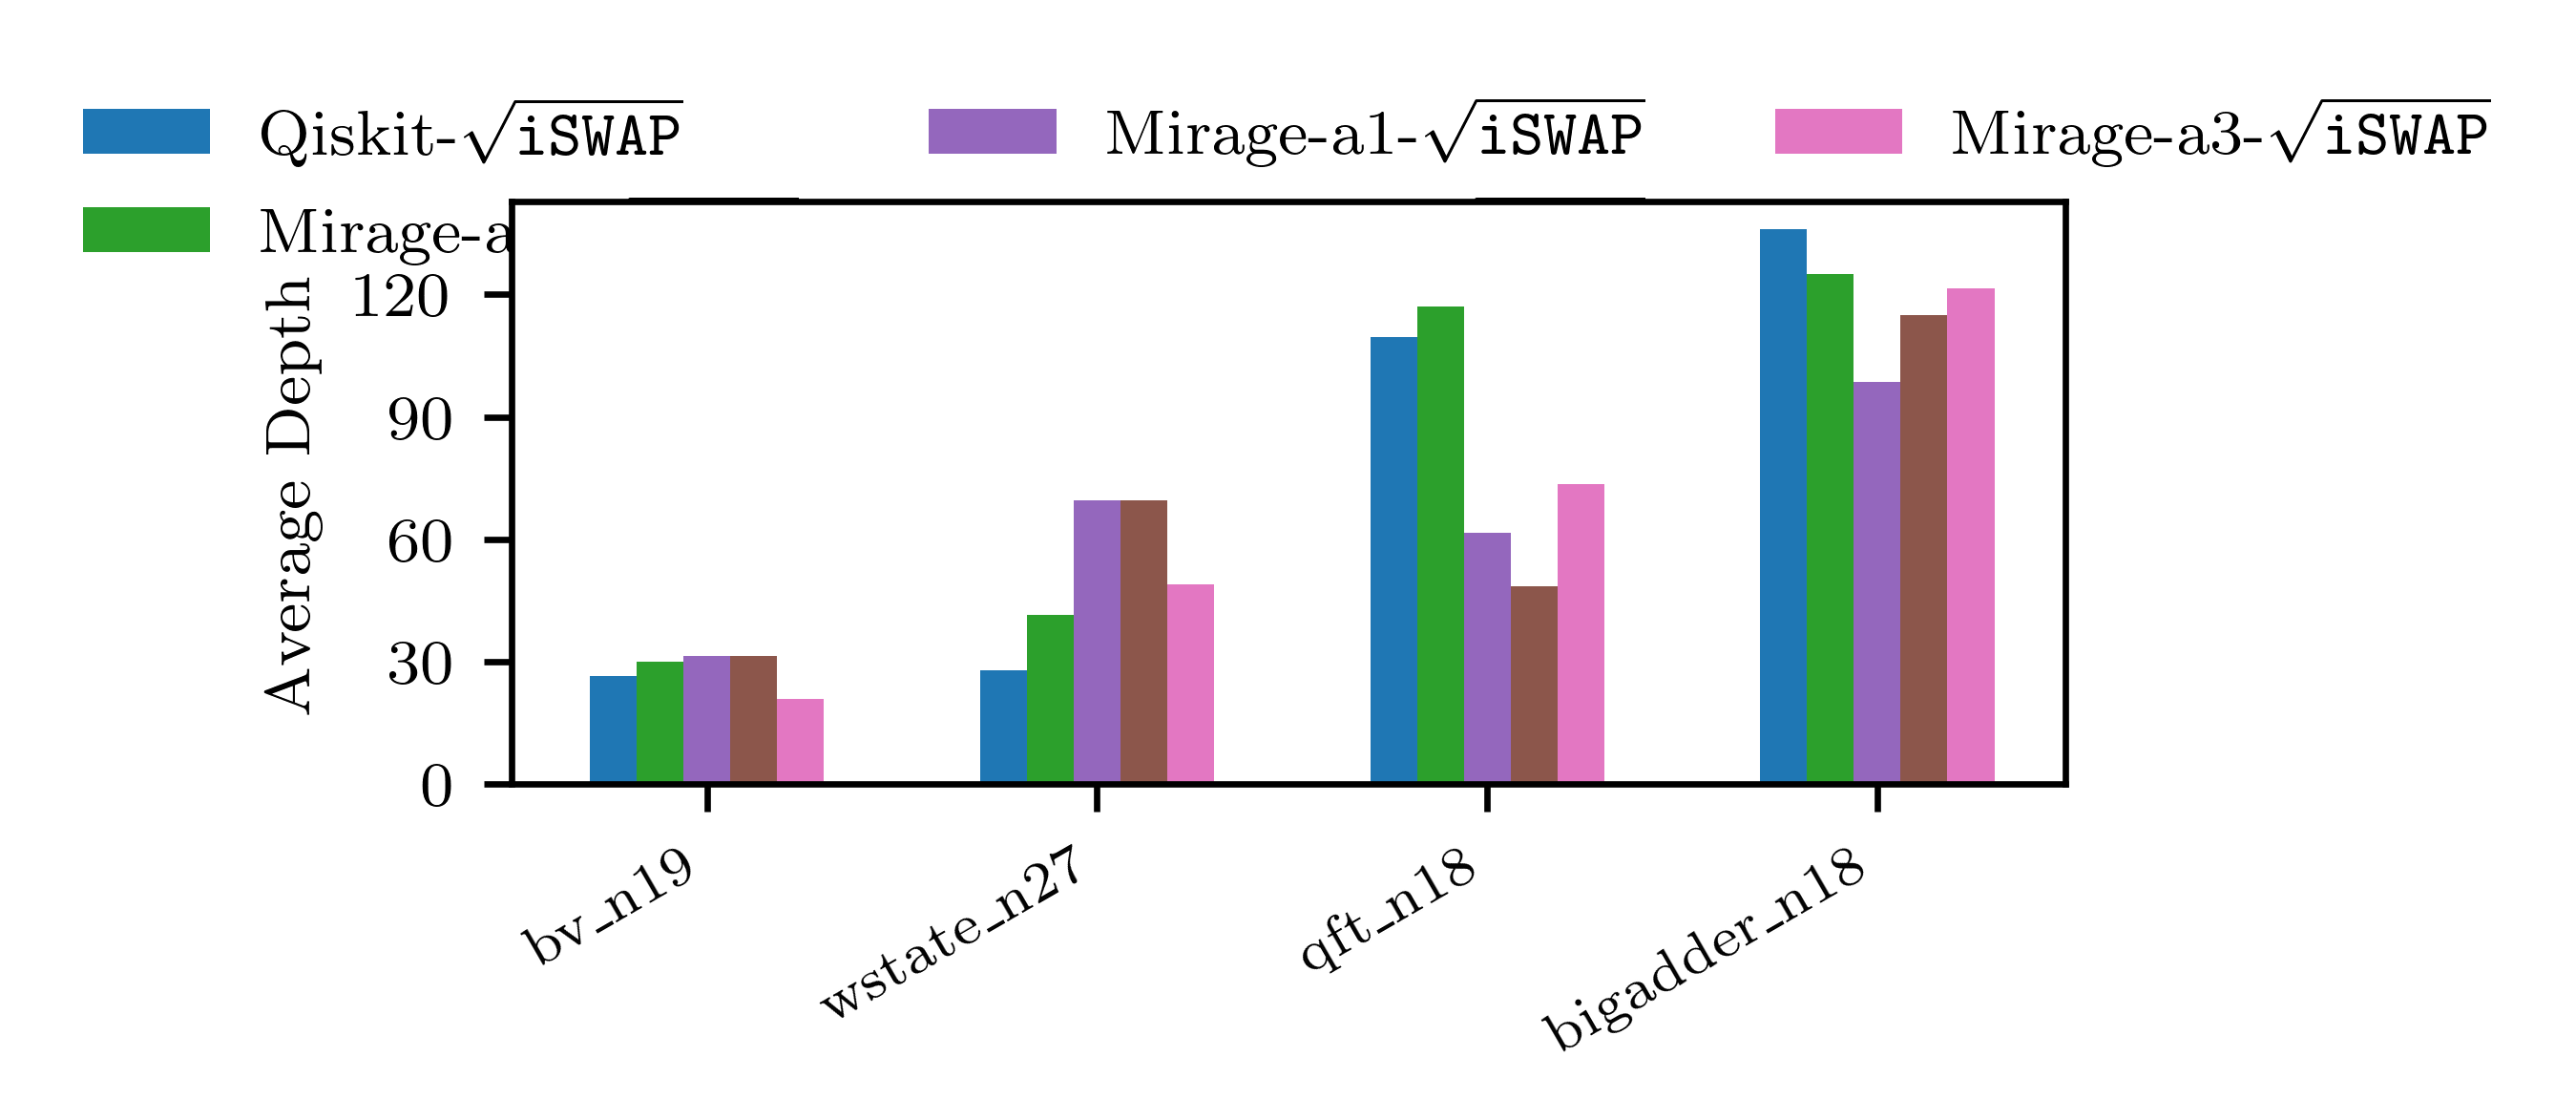

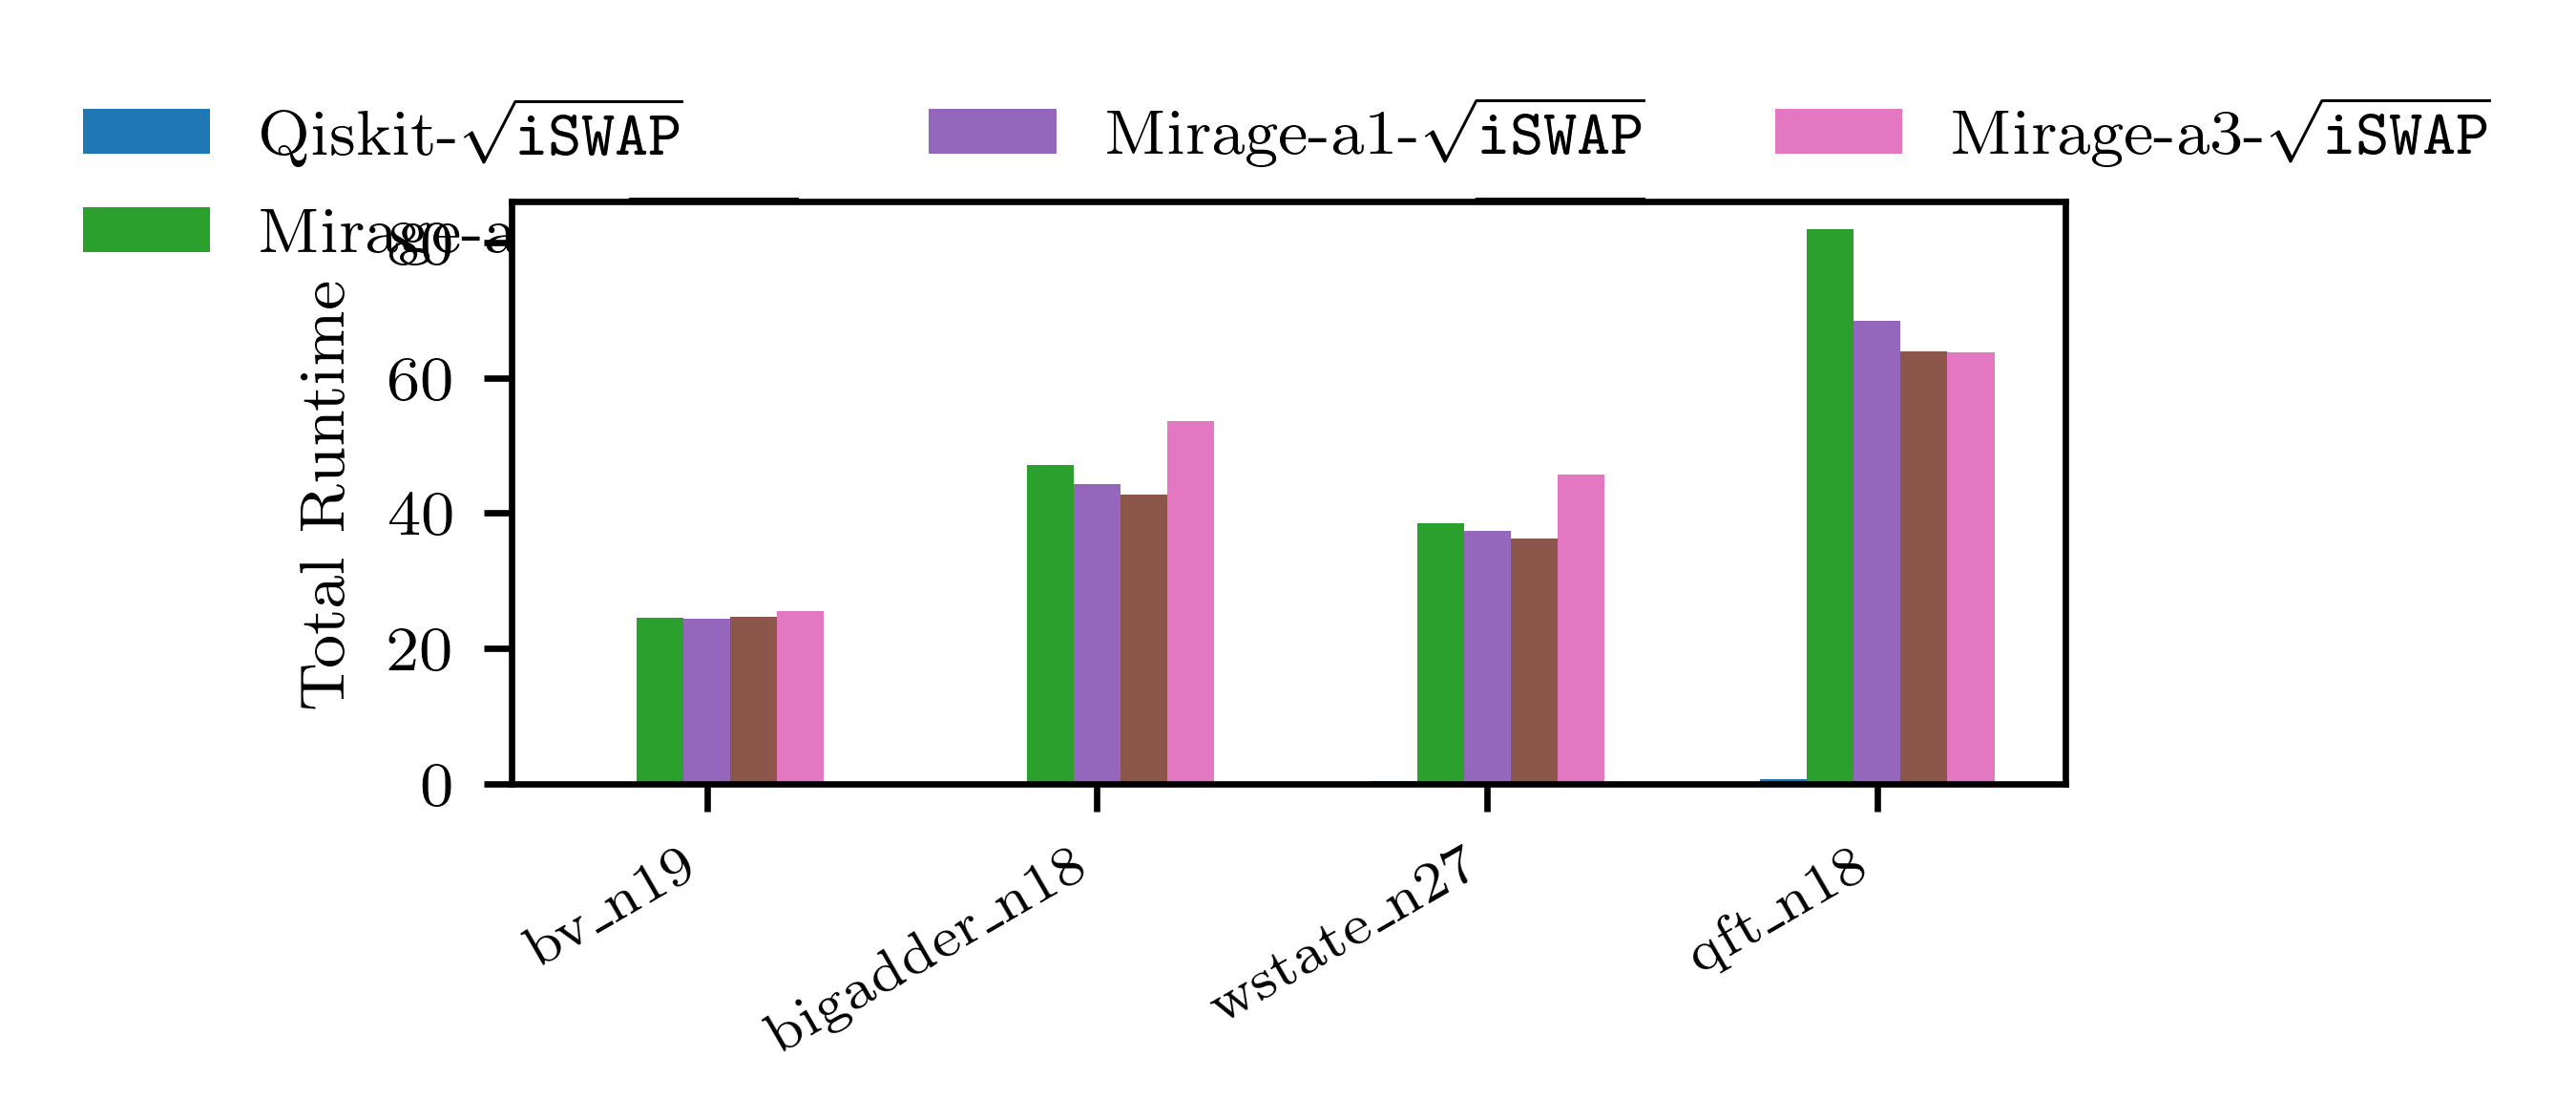

In [ ]:
from transpile_benchy.render import plot_benchmark

plot_benchmark(
    benchmark,
    save=0,
    legend_show=1,
    filename="aggression",
    color_override=[0, 2, 4, 5, 6],
)